<a href="https://colab.research.google.com/github/ParadoxPratibha/Data-Analytics-Projects/blob/main/Custom_knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#------------------------------------------------------------------------------
# Summary       : 
#------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#------------------------------------------------------------------------------
# This function calculates the Euclidean distance between a query_point and a 
# dataSet.
#------------------------------------------------------------------------------

def calculateEuclideanDistance(dataSet, query_point): 

  distance = []
  i = 0

  while i < (len(dataSet) - 1): 
    j = 0
    sum = 0.0
    while j < (len(query_point) - 1): 
      sum = sum + ((dataSet.iat[i,j] - query_point[j])**2)
      j = j + 1
    i = i + 1
    distance.append(sum**0.5)

  return sortingDistanceArray(distance)

#------------------------------------------------------------------------------
# This function calculates the Manhattan distance between a query_point and a 
# dataSet.
#------------------------------------------------------------------------------

def calculateManhattanDistance(dataSet, query_point): 

  distance = []
  i = 0

  while i < (len(dataSet) - 1): 
    j = 0
    sum = 0.0
    while j < (len(query_point) - 1): 
      sum = sum + abs(dataSet.iat[i,j] - query_point[j])
      j = j + 1
    i = i + 1
    distance.append(sum)

  return sortingDistanceArray(distance)

In [ ]:
#------------------------------------------------------------------------------
# This function takes in a distanceArray that contains the distance of a 
# point to a dataset. This function then sorts the array in ascending order
# since the lower distances are of relevance to us and returns this sorted array
# along with the index number (of the dataset) corresponding to the distances
#------------------------------------------------------------------------------

def sortingDistanceArray(distanceArray):

  origArray = distanceArray.copy()
  origIndex = []

  for i in range(0, len(distanceArray)):
    for j in range(i+1, len(distanceArray)):
      if(distanceArray[i] > distanceArray[j]):
        temp = distanceArray[i] 
        distanceArray[i] = distanceArray[j] 
        distanceArray[j] = temp

  for i in range(0, len(distanceArray)): 
    for j in range(0, len(distanceArray)): 
      if(distanceArray[i]==origArray[j]):

        # The following if statement is made to avoid any duplicate index numbers
        # from being stored 

        if j in origIndex: 
          pass 
        else: 
          origIndex.append(j)
          break

  return distanceArray, origIndex

def getFeatureSet(data_frame):
    return data_frame[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide",
                       "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

def getLabelSet(data_frame):
    return data_frame["Quality"]



In [ ]:
#------------------------------------------------------------------------------
# This function takes in a data_frame and arrays containing the minimum and 
# maximum values of the data_frame and uses this value to normalize the data
# within the data_frame using MinMaxNormalization. 
#------------------------------------------------------------------------------

def minmaxDataChange(data_frame, minimum, maximum):

  for i in range(0,len(data_frame)): 
    for j in range(0,len(data_frame.columns)-1): 
      min = minimum[j]
      max = maximum[j]
      data_frame.iat[i,j] = (data_frame.iat[i,j] - min)/(max - min)
  
  return data_frame

#------------------------------------------------------------------------------
# This function takes in the training dataframe and testing dataframe and calls 
# the above function to normalize the data in the training and testing 
# dataframe using the minimum and maximum values of the training dataset 
#------------------------------------------------------------------------------

def minmaxData(data_frame_train, data_frame_test): 

  minValues = data_frame_train.min()
  maxValues = data_frame_train.max()

  data_frame_train = minmaxDataChange(data_frame_train, minValues, maxValues)
  data_frame_test = minmaxDataChange(data_frame_test, minValues, maxValues)

  return data_frame_train, data_frame_test

#------------------------------------------------------------------------------
# This function takes in a data_frame and arrays containing the mean and 
# standard deviation values of the data_frame and uses this value to normalize 
# the data within the data_frame using Z-score normalization. 
#------------------------------------------------------------------------------

def zScoreDataChange(data_frame, meanVal, stddevVal): 

  for i in range(0,len(data_frame)): 
    for j in range(0,len(data_frame.columns)-1): 
      mean = meanVal[j]
      stddev = stddevVal[j]
      data_frame.iat[i,j] = (data_frame.iat[i,j] - mean)/stddev

  return data_frame

#------------------------------------------------------------------------------
# This function takes in the training dataframe and testing dataframe and calls 
# the above function to normalize the data in the training and testing 
# dataframe using the mean and standard deviation values of the training dataset 
#------------------------------------------------------------------------------

def zScoreData(data_frame_train, data_frame_test): 

  meanValues = data_frame_train.mean()
  stddevValues = data_frame_train.std()

  data_frame_train = zScoreDataChange(data_frame_train, meanValues, stddevValues)
  data_frame_test = zScoreDataChange(data_frame_test, meanValues, stddevValues)

  return data_frame_train, data_frame_test

In [ ]:
#------------------------------------------------------------------------------
# This function takes in an array containing a certain number of target 
# variables and returns the most frequently occuring element. This is used in
# the un-weighted k-NN classification
#------------------------------------------------------------------------------

def mostFrequent(quality): 

  count = 0
  value = 1

  for i in quality: 
    freq = quality.count(i)
    if freq > count: 
      count = freq
      value = i 
  
  return value


In [ ]:
#------------------------------------------------------------------------------
# This function takes in a value of k (defined to be every odd value from 2 to
# 40) and performs an un-weighted and weighted k-NN classification. The 
# accuracy of both these classifications is then tested and returned. 
# Certain lines of this code is commented because this program is run several
# times with different settings to check how the settings impact accuracy. 
# The un-weighted and weighted variables used in this function can be
# distiguished as variables involved in the weighted k-NN classification have 
# a 'w' in the beginning of the variable names  
#------------------------------------------------------------------------------

def knn(k, dist, norm): 

  df_train = pd.read_csv("wine-data-project-train.csv")
  df_test  = pd.read_csv("wine-data-project-test.csv")

 # The following two lines are used to implement normalization of the data
 # The necessary line is un-commented based on the kind of normalization we 
 # want to carry out

  if norm == 0: 
    df_train, df_test = minmaxData(df_train, df_test)
  else: 
    df_train, df_test = zScoreData(df_train, df_test)

  classifiedInto = []
  wClassifiedInto = []
  allTrainQuality = getLabelSet(df_train)
  allTestQuality = getLabelSet(df_test) 

  for i in range(0,len(df_test)): 

    # The following two lines are used to implement the distance calulation
    # Based on whether we want to use the Euclidean or Manhattan distance, the
    # corresponding line is un-commented

    if dist == 0: 
      sortedDistance, sortedIndex = calculateEuclideanDistance(df_train, df_test.iloc[i])
    else: 
      sortedDistance, sortedIndex = calculateManhattanDistance(df_train, df_test.iloc[i])
    
    knnClassification = []

    for j in range(0, k): 
      row = sortedIndex[j]
      knnClassification.append(allTrainQuality.iat[row])

    mostCommon = mostFrequent(knnClassification)
    classifiedInto.append(mostCommon)
    
    # This section of the code is where the weighted k-NN is carried out. 
    # It was simpler to put both the un-weighted and weighted k-NN calculation
    # in the same function for calculation purposes
    
    kSmallestWeights = []
    associatedLabels = []
    
    for n in range(0,k): 
      kSmallestWeights.append(sortedDistance[n])
      wRow = sortedIndex[n]
      associatedLabels.append(allTrainQuality.iat[wRow])
    
    kInverseDist = []
    kWeights = []
    sum = 0

    for n in range(0,k): 
      value = (1/kSmallestWeights[n])**2
      kInverseDist.append(value)
      sum = sum + value
    
    for n in range(0,k): 
      value = kInverseDist[n]/sum
      kWeights.append(value)

    totalWeight1 = 0.0
    totalWeightMinus1 = 0.0
    qual1 = 1
    qualminus1 = -1

    for o in range(0,k): 
      if associatedLabels[o] == 1: 
        totalWeight1 = totalWeight1 + kWeights[o]
      else: 
        totalWeightMinus1 = totalWeightMinus1 + kWeights[o]

    if totalWeight1 > totalWeightMinus1: 
      wClassifiedInto.append(qual1)
    else: 
      wClassifiedInto.append(qualminus1) 

  # This section of the code checks for the accuracy of the un-weighted model
  # and returns the accuracy out of 100%

  correctClassification = 0

  for m in range(0,len(df_test)): 
    if allTestQuality.iat[m] == classifiedInto[m]: 
      correctClassification = correctClassification + 1
      m = m + 1

  acc = (correctClassification / len(df_test))*100
  
  # This section of the code checks for the accuracy of the weighted model and
  # returns the accuracy out of 100%

  wCorrectClassification = 0

  for m in range(0,len(df_test)): 
    if allTestQuality.iat[m] == wClassifiedInto[m]: 
      wCorrectClassification = wCorrectClassification + 1
      m = m + 1
    
  wAcc = (wCorrectClassification / len(df_test))*100

  return acc, wAcc

In [ ]:
#------------------------------------------------------------------------------
# This is the main program that will call the knn() function with all odd
# values of k from 2 to 40. The results are then plotted. 
#------------------------------------------------------------------------------

allResultsEucMinMax = []
allResultsEucZScore = []
allResultsManMinMax = []
allResultsManZScore = []

res = 0
wRes = 0

df_train = pd.read_csv("wine-data-project-train.csv")
maxk = int((len(df_train))**0.5)

p = 3
while p < maxk:
  allResultsEucMinMax.append(knn(p, 0, 0))
  allResultsEucZScore.append(knn(p, 0, 1))
  allResultsManMinMax.append(knn(p, 1, 0))
  allResultsManZScore.append(knn(p, 1, 1))
  p = p + 2

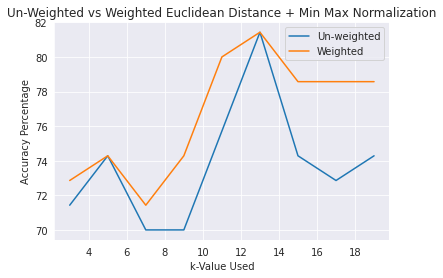

In [ ]:
# Plotting the data

sns.set_style("darkgrid")
plt.title("Un-Weighted vs Weighted Euclidean Distance + Min Max Normalization")
plt.xlabel("k-Value Used")
plt.ylabel("Accuracy Percentage")
plt.plot(list(range(3,maxk,2)),allResultsEucMinMax)
plt.legend(["Un-weighted", "Weighted"])
plt.show()

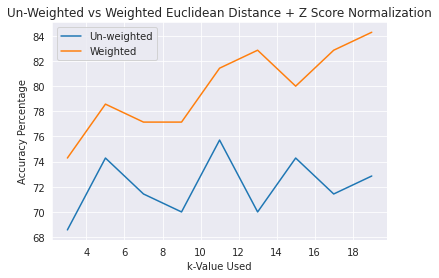

In [ ]:
sns.set_style("darkgrid")
plt.title("Un-Weighted vs Weighted Euclidean Distance + Z Score Normalization")
plt.xlabel("k-Value Used")
plt.ylabel("Accuracy Percentage")
plt.plot(list(range(3,maxk,2)),allResultsEucZScore)
plt.legend(["Un-weighted", "Weighted"])
plt.show()

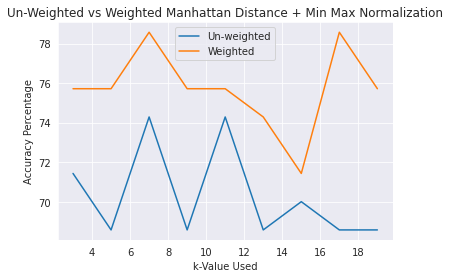

In [ ]:
sns.set_style("darkgrid")
plt.title("Un-Weighted vs Weighted Manhattan Distance + Min Max Normalization")
plt.xlabel("k-Value Used")
plt.ylabel("Accuracy Percentage")
plt.plot(list(range(3,maxk,2)),allResultsManMinMax)
plt.legend(["Un-weighted", "Weighted"])
plt.show()

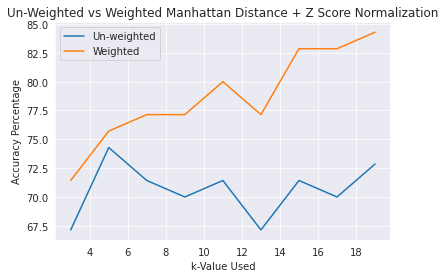

In [ ]:
sns.set_style("darkgrid")
plt.title("Un-Weighted vs Weighted Manhattan Distance + Z Score Normalization")
plt.xlabel("k-Value Used")
plt.ylabel("Accuracy Percentage")
plt.plot(list(range(3,maxk,2)),allResultsManZScore)
plt.legend(["Un-weighted", "Weighted"])
plt.show()

In [ ]:
allResultsW1 = []
allResultsUW1 = []
allResultsW2 = []
allResultsUW2 = []
allResultsW3 = []
allResultsUW3 = []
allResultsW4 = []
allResultsUW4 = []

allAccuracies = []

i = 0
while i < len(allResultsEucMinMax): 
  allResultsUW1.append(allResultsEucMinMax[i][0])
  allResultsW1.append(allResultsEucMinMax[i][1])
  allResultsUW2.append(allResultsEucZScore[i][0])
  allResultsW2.append(allResultsEucZScore[i][1])
  allResultsUW3.append(allResultsManMinMax[i][0])
  allResultsW3.append(allResultsManMinMax[i][1])
  allResultsUW4.append(allResultsManZScore[i][0])
  allResultsW4.append(allResultsManZScore[i][1])
  i = i + 1

Acc = max(allResultsUW1), ((allResultsUW1.index(max(allResultsUW1)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsW1), ((allResultsW1.index(max(allResultsW1)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsUW2), ((allResultsUW2.index(max(allResultsUW2)))*2)+3 
allAccuracies.append(Acc)
Acc = max(allResultsW2), ((allResultsW2.index(max(allResultsW2)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsUW3), ((allResultsUW3.index(max(allResultsUW3)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsW3), ((allResultsW3.index(max(allResultsW3)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsUW4), ((allResultsUW4.index(max(allResultsUW4)))*2)+3
allAccuracies.append(Acc)
Acc = max(allResultsW4), ((allResultsW4.index(max(allResultsW4)))*2)+3
allAccuracies.append(Acc)

i = 0
idx = 0
maximum = allAccuracies[0][0]

while i < len(allAccuracies): 
  if maximum < allAccuracies[i][0]: 
    maximum = allAccuracies[i][0]
    idx = i
  i = i + 1

print("The best accuracy is", maximum, "with k value", allAccuracies[idx][1], "with the metrics: ")

if idx < 4: 
  print("Euclidean Distance")
  if idx < 2: 
    print("Min Max Normalization")
  else: 
    print("Z-Score Normalization")

  if idx%2==0: 
    print("Un Weighted Distance")
  else: 
    print("Weighted Distance")

else: 
  print("Manhattan Distance")
  if idx < 6: 
    print("Min Max Normalization")
  else: 
    print("Z-Score Normalization")

  if idx%2==0: 
    print("Un Weighted Distance")
  else: 
    print("Weighted Distance")

The best accuracy is 84.28571428571429 with k value 19 with the metrics: 
Euclidean Distance
Z-Score Normalization
Weighted Distance


In [ ]:
  print("E + MM", allResultsEucMinMax)
  print("E + ZS", allResultsEucZScore)
  print("M + MM", allResultsManMinMax)
  print("M + ZS", allResultsManZScore)

E + MM [(71.42857142857143, 72.85714285714285), (74.28571428571429, 74.28571428571429), (70.0, 71.42857142857143), (70.0, 74.28571428571429), (75.71428571428571, 80.0), (81.42857142857143, 81.42857142857143), (74.28571428571429, 78.57142857142857), (72.85714285714285, 78.57142857142857), (74.28571428571429, 78.57142857142857)]
E + ZS [(68.57142857142857, 74.28571428571429), (74.28571428571429, 78.57142857142857), (71.42857142857143, 77.14285714285715), (70.0, 77.14285714285715), (75.71428571428571, 81.42857142857143), (70.0, 82.85714285714286), (74.28571428571429, 80.0), (71.42857142857143, 82.85714285714286), (72.85714285714285, 84.28571428571429)]
M + MM [(71.42857142857143, 75.71428571428571), (68.57142857142857, 75.71428571428571), (74.28571428571429, 78.57142857142857), (68.57142857142857, 75.71428571428571), (74.28571428571429, 75.71428571428571), (68.57142857142857, 74.28571428571429), (70.0, 71.42857142857143), (68.57142857142857, 78.57142857142857), (68.57142857142857, 75.7142